<a href="https://colab.research.google.com/github/hacksJuanDavid/IrisClustering/blob/main/IrisClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [28]:
# Chargue data
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


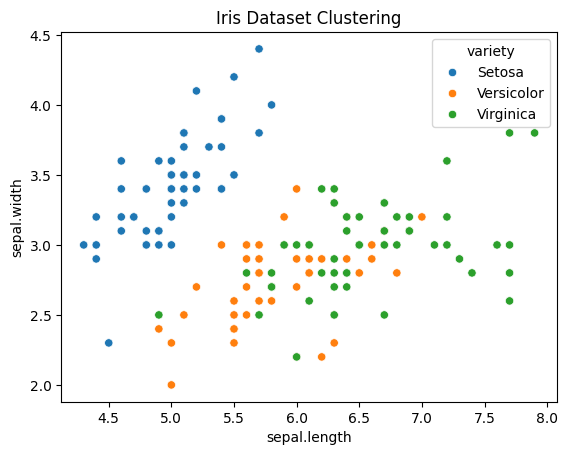

In [29]:
# Assuming you want to cluster based on sepal length and sepal width
sns.scatterplot(x='sepal.length', y='sepal.width', hue='variety', data=df)
plt.title('Iris Dataset Clustering')
plt.show()

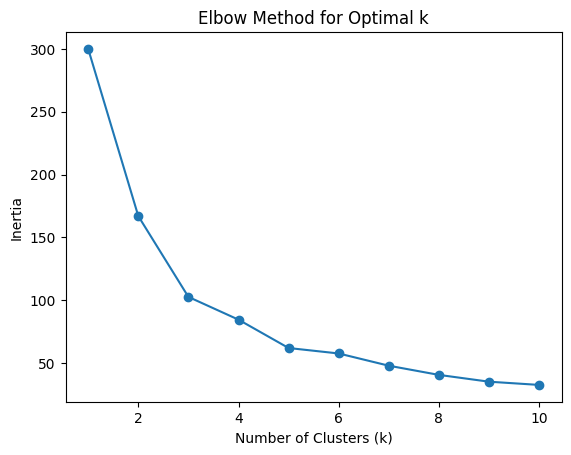

In [30]:
X = df[['sepal.length', 'sepal.width']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

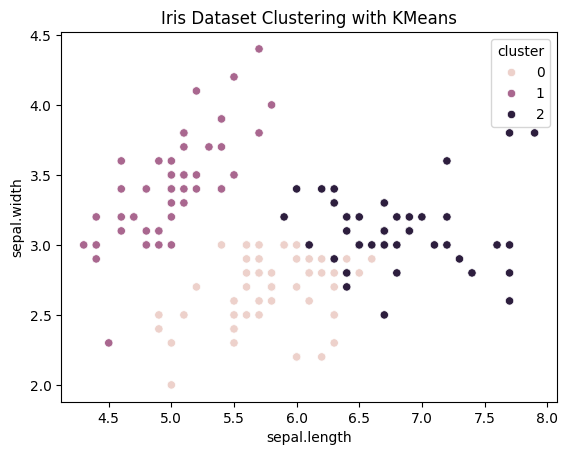

In [31]:
# Select features for clustering
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize the clusters
sns.scatterplot(x='sepal.length', y='sepal.width', hue='cluster', data=df)
plt.title('Iris Dataset Clustering with KMeans')
plt.show()

In [35]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.45994823920518646
